 # Projeto Final
 ---
 ## Descrição projeto final

<b>Objetivos gerais</b><br>

✓ Construção de um pipeline de dados, que consiste em várias etapas: extração, tratamentos, alertas, deploy e documentação.<br>
<i>O objetivo geral do projeto é permitir que os dados brutos sejam coletados, processados, analisados e disponibilizados para uso em diferentes áreas de negócios</i><br><br>
Suas etapas são:
- [x] - Escolher uma API da lista disponível; <br>
- [x] - Fazer a extração de pelo menos 3 tabelas;<br>
- [x] - Realizar os tratamentos devidos das tabelas; <br>
Adicionar os dados tratados em um banco de dados para consulta; <br>
Validar as tabelas disponibilizadas<br><br>

Seu projeto deverá:
- [x] - Estar disponível no GitHub;<br>
- [x] - Ter Documentação;<br>
- [x] - Ter um virtual environment criado para o projeto; <br>
- [x] - Ter um sistema de alerta.<br>


### Primeira entrega

In [24]:
import requests
import pandas as pd
from datetime import datetime
from plyer import notification
import sqlite3
import matplotlib.pyplot as plt

In [5]:
def ler_api_bc():
    # URL dinheiro_em_circulacao
    url_dinheiro_em_circulacao = "https://olinda.bcb.gov.br/olinda/servico/mecir_dinheiro_em_circulacao/versao/v1/odata/informacoes_diarias_com_categoria?$format=json"

    # URL chancelas
    url_chancelas = "https://olinda.bcb.gov.br/olinda/servico/mecir_chancelas/versao/v1/odata/TodosDadosChancelas?$format=json"

    # URL moedas_comemorativas
    url_moedas_comemorativas = "https://olinda.bcb.gov.br/olinda/servico/mecir_moedas_comemorativas/versao/v1/odata/informacoes_diarias?$format=json"

    # Inicializa DataFrames vazios
    df_dinheiro_em_circulacao = pd.DataFrame()
    df_chancelas = pd.DataFrame()
    df_moedas_comemorativas = pd.DataFrame()

    # Função para ler dados da  API e exibir notificação em caso de falha
    def ler_e_notificar(url, df, api_bc):
        try:
            # Faz a solicitação HTTP
            resposta = requests.get(url)

            # Verifica se a solicitação foi bem-sucedida (código de status 200)
            resposta.raise_for_status()

            # Converte os dados JSON para um DataFrame
            dados_json = resposta.json()
            df = pd.DataFrame(dados_json['value'])

            return df
        except requests.exceptions.RequestException as e:
             # Exibe um alerta de erro de conexão usando o plye
            print(f"Erro de conexão {api_bc}: {e}")
            erro_mensagem = f"Dados da {api_bc} não carregados em {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}"
            notification.notify(
                title='Erro de Conexão na API',
                message=erro_mensagem,
                timeout=10,  # Tempo em segundos que a notificação será exibida
                app_name='Api Banco Central'
            )
            return None

    # Chama a função para a  API dinheiro_em_circulaca
    df_dinheiro_em_circulacao = ler_e_notificar(url_dinheiro_em_circulacao, df_dinheiro_em_circulacao, "API dinheiro_em_circulaca")

    # Chama a função para a  API chancelas
    df_chancelas = ler_e_notificar(url_chancelas, df_chancelas, "API chancelas")

    # Chama a função para a  API moedas_comemorativas
    df_moedas_comemorativas = ler_e_notificar(url_moedas_comemorativas, df_moedas_comemorativas, "API moedas_comemorativas")

    return df_dinheiro_em_circulacao, df_chancelas, df_moedas_comemorativas

# Exemplo de uso da função
dados_dataframe_dinheiro_em_circulacao, dados_dataframe_chancelas, dados_moedas_comemorativas = ler_api_bc()

# Exibindo os primeiros registros do DataFrame  dinheiro_em_circulacao
display(dados_dataframe_dinheiro_em_circulacao.head(5))

# Exibindo os primeiros registros do Dataframe chancelas
display(dados_dataframe_chancelas.head(5))

# Exibindo os primeiros registros do DataFrame moedas_comemorativas.hea
display(dados_moedas_comemorativas.head(5))

,Data,Quantidade,Valor,Categoria,Denominacao,Especie
0,1994-11-22,204914511,1.024573e+09,Cédulas - 1a. família,5.00,Cédulas
1,2019-09-13,1200332884,1.200333e+07,Moedas - 2a. Família,0.01,Moedas
2,2019-09-13,5392981432,2.696491e+08,Moedas - 2a. Família,0.05,Moedas
3,2019-09-13,5681159148,5.681159e+08,Moedas - 2a. Família,0.10,Moedas
4,2019-09-13,2661509938,6.653775e+08,Moedas - 2a. Família,0.25,Moedas


,descricaoFamilia,descricaoDenominacao,chancelaMinistro,chancelaBC,serieInicial,serieFinal,serieReposicao
0,Segunda Família do Real,"R$ 5,00 (2ª família)",Paulo Roberto Nunes Guedes,Roberto Campos Neto,KC000000001,KC081550000,None
1,Segunda Família do Real,"R$ 200,00 (2ª família)",Paulo Roberto Nunes Guedes,Roberto Campos Neto,AA000000001,AA050400000,None
2,Segunda Família do Real,"R$ 200,00 (2ª família)",Paulo Roberto Nunes Guedes,Roberto Campos Neto,AH000000001,AH100200000,None
3,Segunda Família do Real,"R$ 200,00 (2ª família)",Paulo Roberto Nunes Guedes,Roberto Campos Neto,AI000000001,AI237000000,None
4,Segunda Família do Real,"R$ 200,00 (2ª família)",Paulo Roberto Nunes Guedes,Roberto Campos Neto,AJ000000001,AJ062400000,None


,Data,Quantidade,Valor,Categoria,Denominacao
0,1995-05-23,1865,37300.0,Moedas comemorativas Tetra campeonato,20.00
1,2019-09-13,7000,14000.0,Moedas comemorativas 300 anos CMB,2.00
2,2019-09-13,5000,15000.0,Moedas comemorativas 30 anos BC,3.00
3,2019-09-13,9000,36000.0,Moedas comemorativas Tetra campeonato,4.00
4,2019-09-13,2000,40000.0,Moedas comemorativas Tetra campeonato,20.00


### Segunda entrega

In [6]:
# Verifique os tipos de dados da tabela 1 
print(dados_dataframe_dinheiro_em_circulacao.dtypes)

Data            object
Quantidade       int64
Valor          float64
Categoria       object
Denominacao     object
Especie         object
dtype: object


In [7]:
# Verifique os tipos de dados da tabela 2 
print(dados_dataframe_chancelas.dtypes)

descricaoFamilia        object
descricaoDenominacao    object
chancelaMinistro        object
chancelaBC              object
serieInicial            object
serieFinal              object
serieReposicao          object
dtype: object


In [8]:
# Verifique os tipos de dados da tabela 3 
print(dados_moedas_comemorativas.dtypes)

Data            object
Quantidade       int64
Valor          float64
Categoria       object
Denominacao     object
dtype: object


In [9]:
# Verificar células que contêm valores ausentes nos DataFrames 
celulas_com_missing_dados_dataframe_dinheiro_em_circulacao = dados_dataframe_dinheiro_em_circulacao.isna()
celulas_com_missing_dados_dataframe_chancelas = dados_dataframe_chancelas.isna()
celulas_com_missing_dados_moedas_comemorativas = dados_moedas_comemorativas.isna()

# Exibir os DataFrames resultantes com True onde há valores ausentes e False onde os valores estão presentes
print(celulas_com_missing_dados_dataframe_dinheiro_em_circulacao.head(5))
print(celulas_com_missing_dados_dataframe_chancelas.head(5))
print(celulas_com_missing_dados_moedas_comemorativas.head(5))


    Data  Quantidade  Valor  Categoria  Denominacao  Especie
0  False       False  False      False        False    False
1  False       False  False      False        False    False
2  False       False  False      False        False    False
3  False       False  False      False        False    False
4  False       False  False      False        False    False
   descricaoFamilia  descricaoDenominacao  chancelaMinistro  chancelaBC  \
0             False                 False             False       False   
1             False                 False             False       False   
2             False                 False             False       False   
3             False                 False             False       False   
4             False                 False             False       False   

   serieInicial  serieFinal  serieReposicao  
0         False       False            True  
1         False       False            True  
2         False       False            True  

In [10]:
# Formata campo Data para o formato dd-mm-yyyy  dataframe dados_dataframe_dinheiro_em_circulacao

dados_dataframe_dinheiro_em_circulacao['Data'] = pd.to_datetime(dados_dataframe_dinheiro_em_circulacao['Data'])
dados_dataframe_dinheiro_em_circulacao['Data_formatada'] = dados_dataframe_dinheiro_em_circulacao['Data'].dt.strftime('%d-%m-%Y')

dinheiro_em_circulacao = dados_dataframe_dinheiro_em_circulacao
dinheiro_em_circulacao # Criado o dataframe dinheiro_em_circulacao para receber o valor do dataframe dados_dataframe_dinheiro_em_circulacao desta forma forma não sendo necessário fazer alteração nós dados da origem

,Data,Quantidade,Valor,Categoria,Denominacao,Especie,Data_formatada
0,1994-11-22,204914511,1.024573e+09,Cédulas - 1a. família,5.00,Cédulas,22-11-1994
1,2019-09-13,1200332884,1.200333e+07,Moedas - 2a. Família,0.01,Moedas,13-09-2019
2,2019-09-13,5392981432,2.696491e+08,Moedas - 2a. Família,0.05,Moedas,13-09-2019
3,2019-09-13,5681159148,5.681159e+08,Moedas - 2a. Família,0.10,Moedas,13-09-2019
4,2019-09-13,2661509938,6.653775e+08,Moedas - 2a. Família,0.25,Moedas,13-09-2019
...,...,...,...,...,...,...,...
197085,2023-10-20,19984500,1.998450e+07,Moedas - 2a. Família - Mascote Paralímpica,1.00,Moedas,20-10-2023
197086,2023-10-20,50000000,5.000000e+07,Moedas - 2a. Família - BC 50 anos,1.00,Moedas,20-10-2023
197087,2023-10-20,24996000,2.499600e+07,Moedas - 2a. Família - REAL 25 anos,1.00,Moedas,20-10-2023
197088,2023-10-20,97270000,4.863500e+06,Moedas - 2a. Família - (A),0.05,Moedas,20-10-2023


In [11]:
# Formata campo Data para o formato dd-mm-yyyy  dataframe dados_moedas_comemorativas
dados_moedas_comemorativas['Data'] = pd.to_datetime(dados_moedas_comemorativas['Data'])
dados_moedas_comemorativas['Data_formatada'] = dados_moedas_comemorativas['Data'].dt.strftime('%d-%m-%Y')

moedas_comemorativas = dados_moedas_comemorativas
moedas_comemorativas # Criado o dataframe moedas_comemorativas para receber o valor do dataframe dados_moedas_comemorativas desta forma forma não sendo necessário fazer alteração nós dados da origem

,Data,Quantidade,Valor,Categoria,Denominacao,Data_formatada
0,1995-05-23,1865,37300.0,Moedas comemorativas Tetra campeonato,20.00,23-05-1995
1,2019-09-13,7000,14000.0,Moedas comemorativas 300 anos CMB,2.00,13-09-2019
2,2019-09-13,5000,15000.0,Moedas comemorativas 30 anos BC,3.00,13-09-2019
3,2019-09-13,9000,36000.0,Moedas comemorativas Tetra campeonato,4.00,13-09-2019
4,2019-09-13,2000,40000.0,Moedas comemorativas Tetra campeonato,20.00,13-09-2019
...,...,...,...,...,...,...
269362,2023-10-20,13500,13500.0,Cartela Rio 2016 - Judô,1.00,20-10-2023
269363,2023-10-20,13500,13500.0,Cartela Rio 2016 - Boxe,1.00,20-10-2023
269364,2023-10-20,13500,13500.0,Cartela Rio 2016 - Natação Paralímpica,1.00,20-10-2023
269365,2023-10-20,15500,15500.0,Cartela Rio 2016 - Mascote Olímpica,1.00,20-10-2023


In [12]:
# Filtra para que os dataframes dinheiro_em_circulacao e  moedas_comemorativas somente exibam dados do ano de 2023

dinheiro_em_circulacao = dinheiro_em_circulacao[dinheiro_em_circulacao['Data'].dt.year == 2023]
display(dinheiro_em_circulacao)


moedas_comemorativas = moedas_comemorativas[moedas_comemorativas['Data'].dt.year == 2023]
display(moedas_comemorativas)

,Data,Quantidade,Valor,Categoria,Denominacao,Especie,Data_formatada
152424,2023-04-10,3058202780,7.645507e+08,Moedas - 2a. Família,0.25,Moedas,10-04-2023
152425,2023-04-10,3002837140,1.501419e+09,Moedas - 2a. Família,0.50,Moedas,10-04-2023
152426,2023-04-10,1200157568,1.200158e+07,Moedas - 2a. Família,0.01,Moedas,10-04-2023
152427,2023-04-10,6186067422,3.093034e+08,Moedas - 2a. Família,0.05,Moedas,10-04-2023
152428,2023-04-10,6421020345,6.421020e+08,Moedas - 2a. Família,0.10,Moedas,10-04-2023
...,...,...,...,...,...,...,...
197085,2023-10-20,19984500,1.998450e+07,Moedas - 2a. Família - Mascote Paralímpica,1.00,Moedas,20-10-2023
197086,2023-10-20,50000000,5.000000e+07,Moedas - 2a. Família - BC 50 anos,1.00,Moedas,20-10-2023
197087,2023-10-20,24996000,2.499600e+07,Moedas - 2a. Família - REAL 25 anos,1.00,Moedas,20-10-2023
197088,2023-10-20,97270000,4.863500e+06,Moedas - 2a. Família - (A),0.05,Moedas,20-10-2023


,Data,Quantidade,Valor,Categoria,Denominacao,Data_formatada
195685,2023-04-10,7000,14000.0,Moedas comemorativas 300 anos CMB,2.00,10-04-2023
195686,2023-04-10,5000,15000.0,Moedas comemorativas 30 anos BC,3.00,10-04-2023
195768,2023-04-10,9000,36000.0,Moedas comemorativas Tetra campeonato,4.00,10-04-2023
195769,2023-04-10,2000,40000.0,Moedas comemorativas Tetra campeonato,20.00,10-04-2023
195770,2023-04-10,10000,20000.0,Moedas comemorativas Ayrton Senna,2.00,10-04-2023
...,...,...,...,...,...,...
269362,2023-10-20,13500,13500.0,Cartela Rio 2016 - Judô,1.00,20-10-2023
269363,2023-10-20,13500,13500.0,Cartela Rio 2016 - Boxe,1.00,20-10-2023
269364,2023-10-20,13500,13500.0,Cartela Rio 2016 - Natação Paralímpica,1.00,20-10-2023
269365,2023-10-20,15500,15500.0,Cartela Rio 2016 - Mascote Olímpica,1.00,20-10-2023


### Entrega Parcial

In [13]:
# Função para criar a nova coluna Titulo com base na coluna Categoria do Dataframe dinheiro_em_circulacao
def dinheiro_em_circulacao_titulo(row):
    if "1a. família" in row['Categoria']:
        return '1ª família'
    elif "2a. Família" in row['Categoria']:
        return '2ª família'
    else:
        return None

# Aplicando a função para criar a nova coluna
dinheiro_em_circulacao['Titulo'] = dinheiro_em_circulacao.apply(dinheiro_em_circulacao_titulo, axis=1)

# Exibindo o DataFrame resultante
display(dinheiro_em_circulacao.head(5))

C:\Users\carmo\AppData\Local\Temp\ipykernel_8688\1524303942.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dinheiro_em_circulacao['Titulo'] = dinheiro_em_circulacao.apply(dinheiro_em_circulacao_titulo, axis=1)


,Data,Quantidade,Valor,Categoria,Denominacao,Especie,Data_formatada,Titulo
152424,2023-04-10,3058202780,7.645507e+08,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família
152425,2023-04-10,3002837140,1.501419e+09,Moedas - 2a. Família,0.50,Moedas,10-04-2023,2ª família
152426,2023-04-10,1200157568,1.200158e+07,Moedas - 2a. Família,0.01,Moedas,10-04-2023,2ª família
152427,2023-04-10,6186067422,3.093034e+08,Moedas - 2a. Família,0.05,Moedas,10-04-2023,2ª família
152428,2023-04-10,6421020345,6.421020e+08,Moedas - 2a. Família,0.10,Moedas,10-04-2023,2ª família


In [14]:
# Função para criar a nova coluna Titulo com base na coluna descricaoDenominacao do Dataframe dados_dataframe_chancelas_titulo
def dados_dataframe_chancelas_titulo(row):
    if "1ª família" in row['descricaoDenominacao']:
        return '1ª família'
    elif "2ª família" in row['descricaoDenominacao']:
        return '2ª família'
    else:
        return None

# Aplicando a função para criar a nova coluna
dados_dataframe_chancelas['Titulo'] = dados_dataframe_chancelas.apply(dados_dataframe_chancelas_titulo, axis=1)

# Exibindo o DataFrame resultante
display(dados_dataframe_chancelas.head(5))

,descricaoFamilia,descricaoDenominacao,chancelaMinistro,chancelaBC,serieInicial,serieFinal,serieReposicao,Titulo
0,Segunda Família do Real,"R$ 5,00 (2ª família)",Paulo Roberto Nunes Guedes,Roberto Campos Neto,KC000000001,KC081550000,None,2ª família
1,Segunda Família do Real,"R$ 200,00 (2ª família)",Paulo Roberto Nunes Guedes,Roberto Campos Neto,AA000000001,AA050400000,None,2ª família
2,Segunda Família do Real,"R$ 200,00 (2ª família)",Paulo Roberto Nunes Guedes,Roberto Campos Neto,AH000000001,AH100200000,None,2ª família
3,Segunda Família do Real,"R$ 200,00 (2ª família)",Paulo Roberto Nunes Guedes,Roberto Campos Neto,AI000000001,AI237000000,None,2ª família
4,Segunda Família do Real,"R$ 200,00 (2ª família)",Paulo Roberto Nunes Guedes,Roberto Campos Neto,AJ000000001,AJ062400000,None,2ª família


### Junção dos dataframes

In [15]:
# Renomeando Colunas do Dataframe dinheiro_em_circulacao
dinheiro_em_circulacao.rename(columns={'Quantidade': 'Quantidade_em_circulacao',
                   'Valor': 'Valor_em_circulacao',
                   'Data_formatada':'Data_formatada_em_circulacao',
                   'Categoria': 'Categoria_em_circulacao',
                   'Denominacao': 'Denominacao_em_circulacao'}, inplace=True)

display(dinheiro_em_circulacao.head(5))

# Renomeando nome das Colunas do Dataframe moedas_comemorativas
moedas_comemorativas.rename(columns={'Quantidade': 'Quantidade_comemorativas',
                   'Valor': 'Valor_comemorativas',
                   'Data_formatada':'Data_formatada_comemorativas',
                   'Categoria': 'Categoria_comemorativas',
                   'Denominacao': 'Denominacao_comemorativas'}, inplace=True)
display(moedas_comemorativas.head(5))


C:\Users\carmo\AppData\Local\Temp\ipykernel_8688\2761377977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dinheiro_em_circulacao.rename(columns={'Quantidade': 'Quantidade_em_circulacao',


,Data,Quantidade_em_circulacao,Valor_em_circulacao,Categoria_em_circulacao,Denominacao_em_circulacao,Especie,Data_formatada_em_circulacao,Titulo
152424,2023-04-10,3058202780,7.645507e+08,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família
152425,2023-04-10,3002837140,1.501419e+09,Moedas - 2a. Família,0.50,Moedas,10-04-2023,2ª família
152426,2023-04-10,1200157568,1.200158e+07,Moedas - 2a. Família,0.01,Moedas,10-04-2023,2ª família
152427,2023-04-10,6186067422,3.093034e+08,Moedas - 2a. Família,0.05,Moedas,10-04-2023,2ª família
152428,2023-04-10,6421020345,6.421020e+08,Moedas - 2a. Família,0.10,Moedas,10-04-2023,2ª família


C:\Users\carmo\AppData\Local\Temp\ipykernel_8688\2761377977.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moedas_comemorativas.rename(columns={'Quantidade': 'Quantidade_comemorativas',


,Data,Quantidade_comemorativas,Valor_comemorativas,Categoria_comemorativas,Denominacao_comemorativas,Data_formatada_comemorativas
195685,2023-04-10,7000,14000.0,Moedas comemorativas 300 anos CMB,2.00,10-04-2023
195686,2023-04-10,5000,15000.0,Moedas comemorativas 30 anos BC,3.00,10-04-2023
195768,2023-04-10,9000,36000.0,Moedas comemorativas Tetra campeonato,4.00,10-04-2023
195769,2023-04-10,2000,40000.0,Moedas comemorativas Tetra campeonato,20.00,10-04-2023
195770,2023-04-10,10000,20000.0,Moedas comemorativas Ayrton Senna,2.00,10-04-2023


In [16]:
# Merge dos  DataFrames dinheiro_em_circulacao + moedas_comemorativas
dincircu_moedCome = pd.merge(dinheiro_em_circulacao, moedas_comemorativas, on='Data', how='inner')
display(dincircu_moedCome.head(5))

,Data,Quantidade_em_circulacao,Valor_em_circulacao,Categoria_em_circulacao,Denominacao_em_circulacao,Especie,Data_formatada_em_circulacao,Titulo,Quantidade_comemorativas,Valor_comemorativas,Categoria_comemorativas,Denominacao_comemorativas,Data_formatada_comemorativas
0,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,7000,14000.0,Moedas comemorativas 300 anos CMB,2.00,10-04-2023
1,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,5000,15000.0,Moedas comemorativas 30 anos BC,3.00,10-04-2023
2,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,9000,36000.0,Moedas comemorativas Tetra campeonato,4.00,10-04-2023
3,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,2000,40000.0,Moedas comemorativas Tetra campeonato,20.00,10-04-2023
4,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,10000,20000.0,Moedas comemorativas Ayrton Senna,2.00,10-04-2023


In [17]:
# Criar um dicionário de mapeamento com base na coluna 'Titulo' no dataframe dados_dataframe_chancelas
titulo_chancela_map = dict(zip(dados_dataframe_chancelas['Titulo'], dados_dataframe_chancelas['Titulo']))

# Criar a nova coluna 'Titulo_Chancela' no dataframe dincircu_moedCome usando map e inserindo os dados pegos no dataframe dados_dataframe_chancelas
dincircu_moedCome['Titulo_Chancela'] = dincircu_moedCome['Titulo'].map(titulo_chancela_map)

display(dincircu_moedCome)


,Data,Quantidade_em_circulacao,Valor_em_circulacao,Categoria_em_circulacao,Denominacao_em_circulacao,Especie,Data_formatada_em_circulacao,Titulo,Quantidade_comemorativas,Valor_comemorativas,Categoria_comemorativas,Denominacao_comemorativas,Data_formatada_comemorativas,Titulo_Chancela
0,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,7000,14000.0,Moedas comemorativas 300 anos CMB,2.00,10-04-2023,2ª família
1,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,5000,15000.0,Moedas comemorativas 30 anos BC,3.00,10-04-2023,2ª família
2,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,9000,36000.0,Moedas comemorativas Tetra campeonato,4.00,10-04-2023,2ª família
3,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,2000,40000.0,Moedas comemorativas Tetra campeonato,20.00,10-04-2023,2ª família
4,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,10000,20000.0,Moedas comemorativas Ayrton Senna,2.00,10-04-2023,2ª família
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992011,2023-10-20,47263900,23631950.0,Moedas - 2a. Família - (A),0.50,Moedas,20-10-2023,2ª família,13500,13500.0,Cartela Rio 2016 - Judô,1.00,20-10-2023,2ª família
992012,2023-10-20,47263900,23631950.0,Moedas - 2a. Família - (A),0.50,Moedas,20-10-2023,2ª família,13500,13500.0,Cartela Rio 2016 - Boxe,1.00,20-10-2023,2ª família
992013,2023-10-20,47263900,23631950.0,Moedas - 2a. Família - (A),0.50,Moedas,20-10-2023,2ª família,13500,13500.0,Cartela Rio 2016 - Natação Paralímpica,1.00,20-10-2023,2ª família
992014,2023-10-20,47263900,23631950.0,Moedas - 2a. Família - (A),0.50,Moedas,20-10-2023,2ª família,15500,15500.0,Cartela Rio 2016 - Mascote Olímpica,1.00,20-10-2023,2ª família


### Criado banco de dados como daframe dincircu_moedCome que é a junção dos 3 daframes 

In [ ]:
# Nome do banco de dados SQLite
projetofinal_DB = 'projetoFinal.db'

# Criar uma conexão SQLite3
con = sqlite3.connect(projetofinal_DB)

# Salvar o DataFrame no banco de dados SQLite3
dincircu_moedCome.to_sql('dincircu_moedCome', con, index=False, if_exists='replace')

# Fechar a conexão
con.close()


In [ ]:
# Verificando tabelas do banco dincircu_moedCom 
conn = sqlite3.connect('projetoFinal.db')
# Executar uma consulta que retorna as informações do esquema do banco de dados
query = "SELECT name FROM sqlite_master WHERE type='table'"
schema = pd.read_sql_query(query, conn)

# Imprimir o DataFrame com os nomes das tabelas
print(schema)

conn.close()

In [ ]:
# Verificando as colunas do banco  dincircu_moedCom
conn = sqlite3.connect('projetoFinal.db')

# Executar uma consulta SELECT na tabela 'produtos' e converter em um DataFrame
query = "SELECT * FROM  dincircu_moedCome"
df = pd.read_sql(query, conn)
display(df)

conn.close()

In [ ]:
# Conectar ao banco de dados SQLite (pode ser um banco de dados temporário)
con = sqlite3.connect(':memory:')  # Use ':memory:' para um banco de dados temporário

# Obter a versão do SQLite
versao_sqlite = con.execute('SELECT sqlite_version();').fetchone()[0]

# Exibir a versão do SQLite
print(f'Versão do SQLite: {versao_sqlite}')

# Fechar a conexão
con.close()

# Entrega Final 

In [18]:

# Criado Dicionaário nome_mes para utilizar a coluna Data gera um coluna Mes conforme o que mês da coluna Data que recebe o ano-mes-dia
# Dicionário com os nomes dos meses
nome_mes = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

# Criar uma coluna "Mes" baseada na coluna "Data"
dincircu_moedCome['Mes'] = pd.to_datetime(dincircu_moedCome['Data']).dt.month

# Criar uma coluna "NomMes" usando o dicionário nome_mes
dincircu_moedCome['NomMes'] = dincircu_moedCome['Mes'].map(nome_mes)

# Exibir o dataframe resultante
display(dincircu_moedCome)

,Data,Quantidade_em_circulacao,Valor_em_circulacao,Categoria_em_circulacao,Denominacao_em_circulacao,Especie,Data_formatada_em_circulacao,Titulo,Quantidade_comemorativas,Valor_comemorativas,Categoria_comemorativas,Denominacao_comemorativas,Data_formatada_comemorativas,Titulo_Chancela,Mes,NomMes
0,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,7000,14000.0,Moedas comemorativas 300 anos CMB,2.00,10-04-2023,2ª família,4,Abril
1,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,5000,15000.0,Moedas comemorativas 30 anos BC,3.00,10-04-2023,2ª família,4,Abril
2,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,9000,36000.0,Moedas comemorativas Tetra campeonato,4.00,10-04-2023,2ª família,4,Abril
3,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,2000,40000.0,Moedas comemorativas Tetra campeonato,20.00,10-04-2023,2ª família,4,Abril
4,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,10000,20000.0,Moedas comemorativas Ayrton Senna,2.00,10-04-2023,2ª família,4,Abril
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992011,2023-10-20,47263900,23631950.0,Moedas - 2a. Família - (A),0.50,Moedas,20-10-2023,2ª família,13500,13500.0,Cartela Rio 2016 - Judô,1.00,20-10-2023,2ª família,10,Outubro
992012,2023-10-20,47263900,23631950.0,Moedas - 2a. Família - (A),0.50,Moedas,20-10-2023,2ª família,13500,13500.0,Cartela Rio 2016 - Boxe,1.00,20-10-2023,2ª família,10,Outubro
992013,2023-10-20,47263900,23631950.0,Moedas - 2a. Família - (A),0.50,Moedas,20-10-2023,2ª família,13500,13500.0,Cartela Rio 2016 - Natação Paralímpica,1.00,20-10-2023,2ª família,10,Outubro
992014,2023-10-20,47263900,23631950.0,Moedas - 2a. Família - (A),0.50,Moedas,20-10-2023,2ª família,15500,15500.0,Cartela Rio 2016 - Mascote Olímpica,1.00,20-10-2023,2ª família,10,Outubro


In [19]:
# Filtro para trazer apenas a Especie = Moedas
moedas = dincircu_moedCome.loc[dincircu_moedCome['Especie'] == 'Moedas']
display(moedas)

,Data,Quantidade_em_circulacao,Valor_em_circulacao,Categoria_em_circulacao,Denominacao_em_circulacao,Especie,Data_formatada_em_circulacao,Titulo,Quantidade_comemorativas,Valor_comemorativas,Categoria_comemorativas,Denominacao_comemorativas,Data_formatada_comemorativas,Titulo_Chancela,Mes,NomMes
0,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,7000,14000.0,Moedas comemorativas 300 anos CMB,2.00,10-04-2023,2ª família,4,Abril
1,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,5000,15000.0,Moedas comemorativas 30 anos BC,3.00,10-04-2023,2ª família,4,Abril
2,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,9000,36000.0,Moedas comemorativas Tetra campeonato,4.00,10-04-2023,2ª família,4,Abril
3,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,2000,40000.0,Moedas comemorativas Tetra campeonato,20.00,10-04-2023,2ª família,4,Abril
4,2023-04-10,3058202780,764550695.0,Moedas - 2a. Família,0.25,Moedas,10-04-2023,2ª família,10000,20000.0,Moedas comemorativas Ayrton Senna,2.00,10-04-2023,2ª família,4,Abril
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992011,2023-10-20,47263900,23631950.0,Moedas - 2a. Família - (A),0.50,Moedas,20-10-2023,2ª família,13500,13500.0,Cartela Rio 2016 - Judô,1.00,20-10-2023,2ª família,10,Outubro
992012,2023-10-20,47263900,23631950.0,Moedas - 2a. Família - (A),0.50,Moedas,20-10-2023,2ª família,13500,13500.0,Cartela Rio 2016 - Boxe,1.00,20-10-2023,2ª família,10,Outubro
992013,2023-10-20,47263900,23631950.0,Moedas - 2a. Família - (A),0.50,Moedas,20-10-2023,2ª família,13500,13500.0,Cartela Rio 2016 - Natação Paralímpica,1.00,20-10-2023,2ª família,10,Outubro
992014,2023-10-20,47263900,23631950.0,Moedas - 2a. Família - (A),0.50,Moedas,20-10-2023,2ª família,15500,15500.0,Cartela Rio 2016 - Mascote Olímpica,1.00,20-10-2023,2ª família,10,Outubro


In [20]:
# Filtro para trazer apenas a Especie = Cédulas
cedulas = dincircu_moedCome.loc[dincircu_moedCome['Especie'] == 'Cédulas']
display(cedulas)

,Data,Quantidade_em_circulacao,Valor_em_circulacao,Categoria_em_circulacao,Denominacao_em_circulacao,Especie,Data_formatada_em_circulacao,Titulo,Quantidade_comemorativas,Valor_comemorativas,Categoria_comemorativas,Denominacao_comemorativas,Data_formatada_comemorativas,Titulo_Chancela,Mes,NomMes
498,2023-04-10,3475591,3.475591e+07,Cédulas - em polímero,10.00,Cédulas,10-04-2023,None,7000,14000.0,Moedas comemorativas 300 anos CMB,2.00,10-04-2023,NaN,4,Abril
499,2023-04-10,3475591,3.475591e+07,Cédulas - em polímero,10.00,Cédulas,10-04-2023,None,5000,15000.0,Moedas comemorativas 30 anos BC,3.00,10-04-2023,NaN,4,Abril
500,2023-04-10,3475591,3.475591e+07,Cédulas - em polímero,10.00,Cédulas,10-04-2023,None,9000,36000.0,Moedas comemorativas Tetra campeonato,4.00,10-04-2023,NaN,4,Abril
501,2023-04-10,3475591,3.475591e+07,Cédulas - em polímero,10.00,Cédulas,10-04-2023,None,2000,40000.0,Moedas comemorativas Tetra campeonato,20.00,10-04-2023,NaN,4,Abril
502,2023-04-10,3475591,3.475591e+07,Cédulas - em polímero,10.00,Cédulas,10-04-2023,None,10000,20000.0,Moedas comemorativas Ayrton Senna,2.00,10-04-2023,NaN,4,Abril
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990268,2023-10-20,131031632,2.620633e+10,Cédulas - 2a. família,200.00,Cédulas,20-10-2023,None,13500,13500.0,Cartela Rio 2016 - Judô,1.00,20-10-2023,NaN,10,Outubro
990269,2023-10-20,131031632,2.620633e+10,Cédulas - 2a. família,200.00,Cédulas,20-10-2023,None,13500,13500.0,Cartela Rio 2016 - Boxe,1.00,20-10-2023,NaN,10,Outubro
990270,2023-10-20,131031632,2.620633e+10,Cédulas - 2a. família,200.00,Cédulas,20-10-2023,None,13500,13500.0,Cartela Rio 2016 - Natação Paralímpica,1.00,20-10-2023,NaN,10,Outubro
990271,2023-10-20,131031632,2.620633e+10,Cédulas - 2a. família,200.00,Cédulas,20-10-2023,None,15500,15500.0,Cartela Rio 2016 - Mascote Olímpica,1.00,20-10-2023,NaN,10,Outubro


In [21]:
# Agrupamento dataframe moedas
moedas = moedas.groupby(['Mes','NomMes'])['Valor_em_circulacao'].sum().reset_index()
moedas = moedas.sort_values(by='Mes')
# moedas = moedas.rename(columns={'Valor_em_circulacao':'Moeda Em Circulação'})
display(moedas)

# Agrupamento dataframe cedulas
cedulas = cedulas.groupby(['Mes','NomMes'])['Valor_em_circulacao'].sum().reset_index()
cedulas = cedulas.sort_values(by='Mes')
# cedulas = cedulas.rename(columns={'Valor_em_circulacao':'Cedulas Em Circulação'})
display(cedulas)

,Mes,NomMes,Valor_em_circulacao
0,1,Janeiro,1.432724e+13
1,2,Fevereiro,1.175714e+13
2,3,Março,1.506946e+13
3,4,Abril,1.182732e+13
4,5,Maio,1.450580e+13
5,6,Junho,1.389405e+13
6,7,Julho,1.393559e+13
7,8,Agosto,1.532055e+13
8,9,Setembro,1.336400e+13
9,10,Outubro,1.407249e+13


,Mes,NomMes,Valor_em_circulacao
0,1,Janeiro,6.102131e+14
1,2,Fevereiro,4.952756e+14
2,3,Março,6.241317e+14
3,4,Abril,4.799489e+14
4,5,Maio,5.818398e+14
5,6,Junho,5.623688e+14
6,7,Julho,5.736143e+14
7,8,Agosto,6.250397e+14
8,9,Setembro,5.358590e+14
9,10,Outubro,5.576875e+14


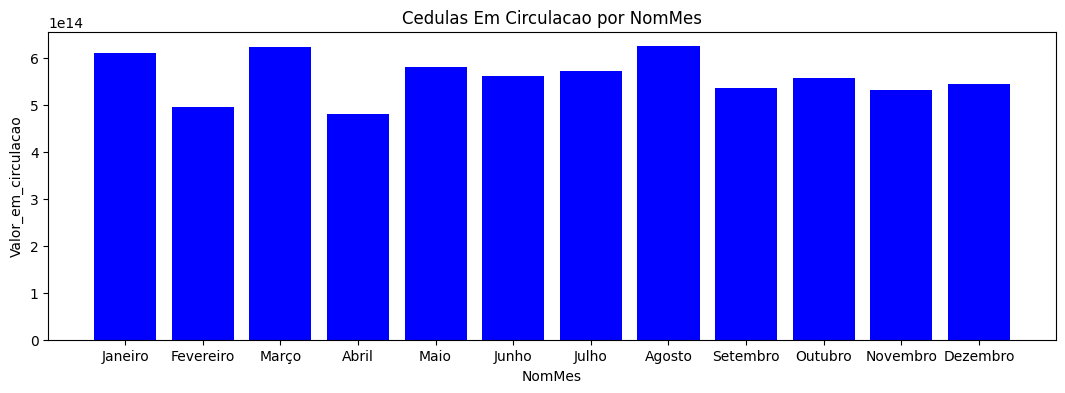

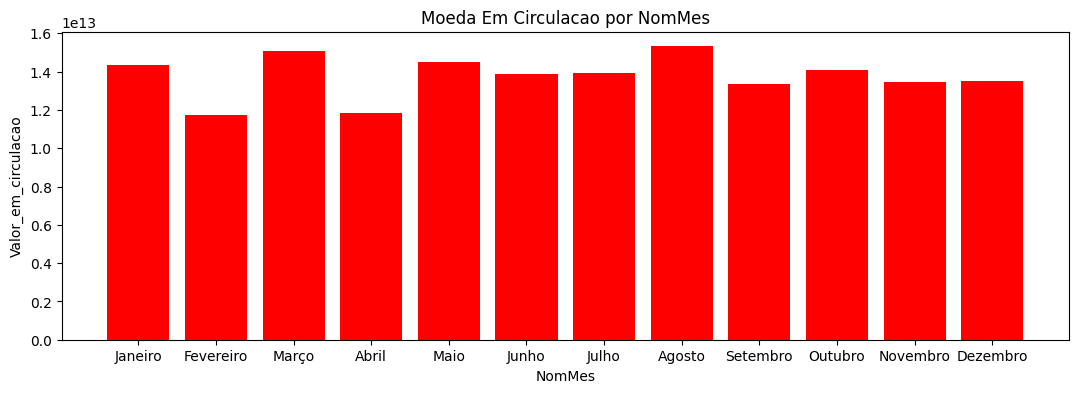

In [25]:
# Gráfico para Cedulas
plt.figure(figsize=(13, 4))
plt.bar(cedulas['NomMes'], cedulas['Valor_em_circulacao'], color='blue')
plt.xlabel('NomMes')
plt.ylabel('Valor_em_circulacao')
plt.title('Cedulas Em Circulacao por NomMes')
plt.show()

# Gráfico para Moedas
plt.figure(figsize=(13, 4))
plt.bar(moedas['NomMes'], moedas['Valor_em_circulacao'], color='red')
plt.xlabel('NomMes')
plt.ylabel('Valor_em_circulacao')
plt.title('Moeda Em Circulacao por NomMes')
plt.show()